<a href="https://colab.research.google.com/github/VenkataJanga/UPX-Assignments/blob/master/UPX_CreditCard_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,accuracy_score

In [48]:
cr_data = pd.read_csv('/content/creditcard.csv')
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198149 entries, 0 to 198148
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    198149 non-null  float64
 1   V1      198149 non-null  float64
 2   V2      198149 non-null  float64
 3   V3      198149 non-null  float64
 4   V4      198149 non-null  float64
 5   V5      198149 non-null  float64
 6   V6      198149 non-null  float64
 7   V7      198149 non-null  float64
 8   V8      198149 non-null  float64
 9   V9      198149 non-null  float64
 10  V10     198149 non-null  float64
 11  V11     198149 non-null  float64
 12  V12     198148 non-null  float64
 13  V13     198148 non-null  float64
 14  V14     198148 non-null  float64
 15  V15     198148 non-null  float64
 16  V16     198148 non-null  float64
 17  V17     198148 non-null  float64
 18  V18     198148 non-null  float64
 19  V19     198148 non-null  float64
 20  V20     198148 non-null  float64
 21  V21     19

In [49]:
cr_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [50]:
# determine the number of fraut cases in data sets
cr_data['Class'].value_counts()

0.0    197765
1.0       383
Name: Class, dtype: int64

In [51]:
cr_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [0]:
cr_data.fillna(0, inplace = True) 

In [53]:
cr_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [54]:
fraud_cases = cr_data[cr_data['Class']==0]
valid_cases = cr_data[cr_data['Class']==1]
outlier_fraction = len(fraud_cases) / float(len(valid_cases))
print(outlier_fraction)
print('Fraud Cases {}'.format(len(fraud_cases)))
print('Valid Cases {}'.format(len(valid_cases)))

516.3603133159269
Fraud Cases 197766
Valid Cases 383


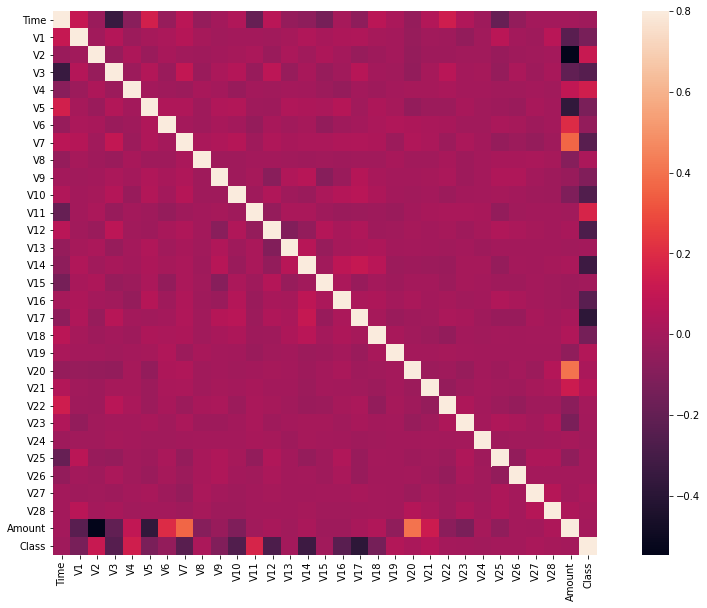

In [55]:
#correlation matrix
corrmat = cr_data.corr()
fig = plt.figure(figsize = (16,10))
sns.heatmap(corrmat,vmax = 0.8,square = True)

In [56]:
cr_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [0]:
X = cr_data.iloc[:,0:30]
y = cr_data.iloc[:,-1:]

In [58]:
print(X.shape);print();print(y.shape)

(198149, 30)

(198149, 1)


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
from sklearn.linear_model import LogisticRegression

logg_reg_model = LogisticRegression()
logg_reg_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_logreg_prediction = logg_reg_model.predict(X_test)
y_logreg_prediction_prob = logg_reg_model.predict_proba(X_test)[:,1]

In [63]:
#Performance metrics evaluation
print("Confusion Martix:\t {}".format(confusion_matrix(y_test,y_logreg_prediction)))
print("Accuracy \t {}".format(accuracy_score(y_test,y_logreg_prediction)))
print("Precision:\t".format(precision_score(y_test,y_logreg_prediction)))
print("Recall:\t {}".format(recall_score(y_test,y_logreg_prediction)))
print("AUC:\t {}".format(roc_auc_score(y_test,y_logreg_prediction_prob)))
auc=roc_auc_score(y_test,y_logreg_prediction_prob)

Confusion Martix:	 [[39523    33]
 [   26    48]]
Accuracy 	 0.9985112288670199
Precision:	
Recall:	 0.6486486486486487
AUC:	 0.9158797790610915


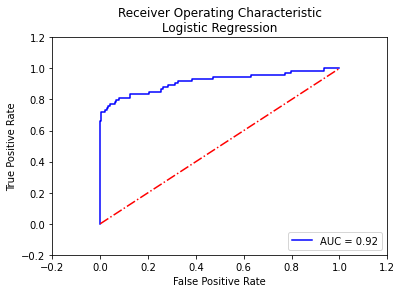

In [64]:
#Ploting the ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_logreg_prediction_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#K Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_knn_predict = knn.predict(X_test)
y_knn_predict_prob = knn.predict_proba(X_test)[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Confusion Matrix 	[[39555     1]
 [   69     5]]
Accuracy 	0.9982336613676508
Precision:	
Recall:	 0.06756756756756757
AUC:	 0.6135451484450373


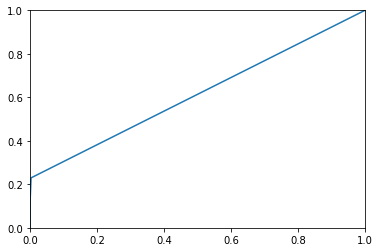

In [66]:
#metrics evaluation
print('Confusion Matrix \t{}'.format(confusion_matrix(y_test,y_knn_predict)))
print("Accuracy \t{}".format(accuracy_score(y_test,y_knn_predict)))
print("Precision:\t".format(precision_score(y_test,y_knn_predict)))
print("Recall:\t {}".format(recall_score(y_test,y_knn_predict)))
print("AUC:\t {}".format(roc_auc_score(y_test,y_knn_predict_prob)))

#ploting the ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_knn_predict_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

**Random Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_rfc_predict = rfc.predict(X_test)
y_rfc_predict_prob = rfc.predict_proba(X_test)[:,1]

In [69]:
#Performance metrics evaluation
print("Confusion Matrix \t{}".format(confusion_matrix(y_test,y_rfc_predict)))
print("Accuracy \t{}".format(accuracy_score(y_test,y_rfc_predict)))
print("Precission \t{}".format(precision_score(y_test,y_rfc_predict)))
print("Recall \t{}".format(recall_score(y_test,y_rfc_predict)))
print("AUC \t{}".format(roc_auc_score(y_test,y_rfc_predict_prob)))
auc = roc_auc_score(y_test,y_rfc_predict_prob)

Confusion Matrix 	[[39553     3]
 [   18    56]]
Accuracy 	0.9994700984102952
Precission 	0.9491525423728814
Recall 	0.7567567567567568
AUC 	0.9236202592014605


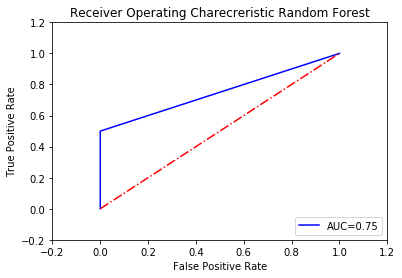

In [0]:
#Plotting the ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_rfc_predict)
plt.plot(fpr,tpr,'b',label ='AUC=%0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title("Receiver Operating Charecreristic Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Balanced and imbalaced data using**
